# **Dataset - NBA Players Stats (Classificação)**

O objetivo do grupo ao analisar esse dataset é, por meio das estatisticas dos jogadores da NBA durante a temporada, descobrir qual a posição em que cada um deles joga.

## **1. Inserção das bibliotecas e leitura dos arquivos**

Nessa etapa será feita a leitura dos arquivos (datasets) a serem analisados pelo grupo, além da criação dos dataframes.

#### Imports Python

In [106]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # Para mostrar todas as colunas no .describe()

#### Leitura dos datasets

In [107]:
df_regular = pd.read_csv('NBA/2021-2022 NBA Player Stats - Regular.csv', encoding='latin-1', sep=';')
df_playoffs = pd.read_csv('NBA/2021-2022 NBA Player Stats - Playoffs.csv', encoding='latin-1', sep=';')


#### Juntando os dois datasets

In [108]:
df_total = pd.concat([df_regular, df_playoffs], ignore_index=True) # dataframe para EDA
df_final = df_total # dataframe final para análise em pré-processamento e predições
df_base = df_total # dataframe "bruto" para benchmark na etapa de predições

Começamos realizando o .head(), para visualizar as primeiras linhas do dataset

In [109]:
df_total.head()

Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  \
0   1   Precious Achiuwa   C   22  TOR  73  28  23.6  3.6   8.3  0.439  0.8   
1   2       Steven Adams   C   28  MEM  76  75  26.3  2.8   5.1  0.547  0.0   
2   3        Bam Adebayo   C   24  MIA  56  56  32.6  7.3  13.0  0.557  0.0   
3   4       Santi Aldama  PF   21  MEM  32   0  11.3  1.7   4.1  0.402  0.2   
4   5  LaMarcus Aldridge   C   36  BRK  47  12  22.3  5.4   9.7  0.550  0.3   

   3PA    3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB   TRB  AST  \
0  2.1  0.359  2.9   6.1  0.468  0.486  1.1  1.8  0.595  2.0  4.5   6.5  1.1   
1  0.0  0.000  2.8   5.0  0.548  0.547  1.4  2.6  0.543  4.6  5.4  10.0  3.4   
2  0.1  0.000  7.3  12.9  0.562  0.557  4.6  6.1  0.753  2.4  7.6  10.1  3.4   
3  1.5  0.125  1.5   2.6  0.560  0.424  0.6  1.0  0.625  1.0  1.7   2.7  0.7   
4  1.0  0.304  5.1   8.8  0.578  0.566  1.9  2.2  0.873  1.6  3.9   5.5  0.9   

   STL  BLK  TOV   PF   PTS  
0  0.5  0.6  1.2  2.1   9.1  
1  0.9  0.8  1.5  2.0   6.9  
2  1.4  0.8  2.6  3.1  19.1  
3  0.2  0.3  0.5  1.1   4.1  
4  0.3  1.0  0.9  1.7  12.9

## **2. Analise Exploratória dos Dados**

Nesta etapa o grupo realiza a análise exploratória dos dados, cujo objetivo é entender os valores das features e sua correlação com a classe alvo, por meio de gráficos e tabelas contando informações descritivas do dataset.

O grupo iniciou utilizando a função .info() do dataframe, para verificar contagem total de valores não nulos e o tipo de dado de cada coluna. Com base nos resultados é possível observar que o dataset não contém entradas nulas.

In [110]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1029 non-null   int64  
 1   Player  1029 non-null   object 
 2   Pos     1029 non-null   object 
 3   Age     1029 non-null   int64  
 4   Tm      1029 non-null   object 
 5   G       1029 non-null   int64  
 6   GS      1029 non-null   int64  
 7   MP      1029 non-null   float64
 8   FG      1029 non-null   float64
 9   FGA     1029 non-null   float64
 10  FG%     1029 non-null   float64
 11  3P      1029 non-null   float64
 12  3PA     1029 non-null   float64
 13  3P%     1029 non-null   float64
 14  2P      1029 non-null   float64
 15  2PA     1029 non-null   float64
 16  2P%     1029 non-null   float64
 17  eFG%    1029 non-null   float64
 18  FT      1029 non-null   float64
 19  FTA     1029 non-null   float64
 20  FT%     1029 non-null   float64
 21  ORB     1029 non-null   float64
 22  

Após realização do .info(), o grupo seguiu para a etapa de descrição (por meio do .describe(), incluindo 'all' para que as colunas não numéricas apareçam também). Com base na descrição, é possível ver que há 31 times (a liga possui 30), e um time com sigla TOT. TOT é utilizado para sumarizar os dados de um jogador quando o mesmo jogou por mais de um time na temporada. Além disso, quando o jogador que jogou por mais de um time e jogou em posições distintas ele pode aparecer com uma "posição mista" (como 'SF-PF'). Isso atrapalharia o modelo.

In [111]:
df_total.describe(include='all') # Descrição do todo

Rk       Player   Pos          Age    Tm            G  \
count   1029.000000         1029  1029  1029.000000  1029  1029.000000   
unique          NaN          606    11          NaN    31          NaN   
top             NaN  Greg Monroe    SG          NaN   TOT          NaN   
freq            NaN            6   248          NaN    97          NaN   
mean     263.273081          NaN   NaN    26.165209   NaN    30.801749   
std      175.235007          NaN   NaN     4.101807   NaN    25.821475   
min        1.000000          NaN   NaN    19.000000   NaN     1.000000   
25%      116.000000          NaN   NaN    23.000000   NaN     6.000000   
50%      227.000000          NaN   NaN    25.000000   NaN    22.000000   
75%      412.000000          NaN   NaN    29.000000   NaN    55.000000   
max      605.000000          NaN   NaN    41.000000   NaN    82.000000   

                 GS           MP          FG          FGA          FG%  \
count   1029.000000  1029.000000  1029.00000  1029.000000  1029.000000   
unique          NaN          NaN         NaN          NaN          NaN   
top             NaN          NaN         NaN          NaN          NaN   
freq            NaN          NaN         NaN          NaN          NaN   
mean      14.001944    18.510787     2.90690     6.460641     0.428614   
std       21.946566    10.417364     2.33211     4.931101     0.156789   
min        0.000000     0.000000     0.00000     0.000000     0.000000   
25%        0.000000    10.000000     1.20000     2.800000     0.378000   
50%        3.000000    17.600000     2.40000     5.100000     0.439000   
75%       17.000000    27.200000     4.00000     9.000000     0.500000   
max       82.000000    44.000000    12.20000    23.800000     1.000000   

                 3P          3PA          3P%           2P          2PA  \
count   1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.884645     2.590087     0.275859     2.023712     3.872789   
std        0.870237     2.279284     0.167586     1.852919     3.401662   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.100000     0.700000     0.200000     0.600000     1.300000   
50%        0.700000     2.100000     0.322000     1.500000     2.900000   
75%        1.400000     4.000000     0.375000     2.900000     5.300000   
max        4.500000    11.700000     1.000000    11.200000    20.300000   

                2P%         eFG%           FT          FTA          FT%  \
count   1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.489548     0.491689     1.254616     1.629640     0.650882   
std        0.190048     0.167695     1.412751     1.740054     0.297500   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.439000     0.455000     0.300000     0.500000     0.591000   
50%        0.511000     0.516000     0.900000     1.200000     0.750000   
75%        0.581000     0.565000     1.600000     2.100000     0.840000   
max        1.000000     1.500000     9.600000    11.800000     1.000000   

                ORB          DRB          TRB          AST          STL  \
count   1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.804665     2.542371     3.346939     1.812536    

Para confirmar a quantidade de posições registradas no dataset, o grupo utilizou a função .unique() na classe alvo. Os resultados mostram que existem posições mistas no dataset. Para checar se são originadas devido as linhas com TOT, iremos removê-las e rodar novamente.

In [112]:
df_total['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF', 'SG-PG', 'SG-SF', 'PF-SF', 'PG-SG',
       'SF-SG', 'C-PF'], dtype=object)

In [113]:
posicoes_para_remover = df_total[df_total['Tm'] == 'TOT'].index
df_total = df_total.drop(posicoes_para_remover)
df_total['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF'], dtype=object)

É possível observar que agora apenas as posições originais do jogo estão no Dataset.

Ainda com base na tabela descritiva gerada pelo .describe(), observou-se que há jogadores com registro de 0 minutos jogados em média. O grupo então verificou quantos jogadores estão nessa condição. Devido a baixa amostragem de jogadores nessa condição, o grupo optou por remover os jogadores que jogaram menos de 1 minuto (devido ao baixo impacto).

In [114]:
df_minutos = df_total[df_total['MP'] < 1]
df_minutos['MP'].describe()

count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: MP, dtype: float64

In [115]:
linhas_para_remover = df_total[df_total['MP'] < 1].index
df_total = df_total.drop(linhas_para_remover)
df_total['MP'].describe()

count    930.000000
mean      18.684409
std       10.617283
min        1.000000
25%       10.000000
50%       17.950000
75%       27.400000
max       44.000000
Name: MP, dtype: float64

Finalizando as análises com base no describe, o grupo optou por remover a coluna Rk, uma vez que a mesma se comporta como um index.

In [116]:
df_total = df_total.drop(columns=['Rk'])

Dando continuidade nas análises, o grupo optou por um gráfico de distribuição entre as classes, para observar se existe algum desbalanceamento no dataset. Com base na análise do gráfico, é perceptível que existem mais jogadores SG em comparação com as outras classes. Porém o delta entre SG (classe com maior n° de registros) e C (classe com menor n° de registros) não é tão discrepante. Portanto o grupo constata que não há desbalanceamento entre as classes.

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

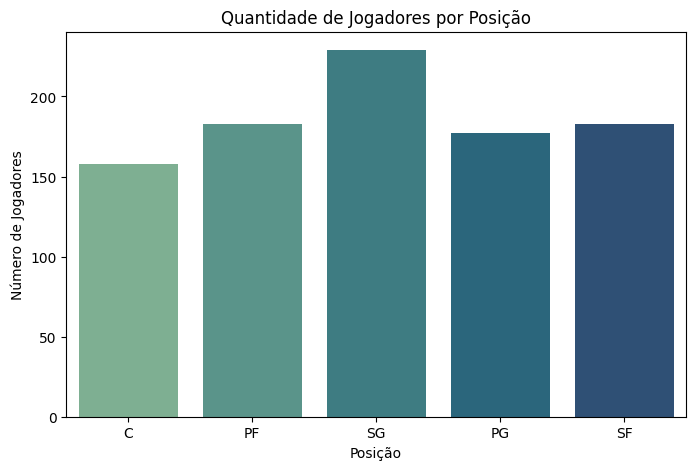

In [118]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_total, x='Pos', hue='Pos', palette='crest', legend=False)
plt.title('Quantidade de Jogadores por Posição')
plt.xlabel('Posição')
plt.ylabel('Número de Jogadores')
plt.show()

#### Descrevendo classe por classe

O grupo optou pela descrição classe por classe para obter um panorama geral dos dados, segregados por cada classe

In [119]:
display(df_total.describe())
display(df_total[df_total["Pos"] == "PG"].describe())
display(df_total[df_total["Pos"] == "SG"].describe())
display(df_total[df_total["Pos"] == "SF"].describe())
display(df_total[df_total["Pos"] == "PF"].describe())
display(df_total[df_total["Pos"] == "C"].describe())

Age           G          GS          MP          FG         FGA  \
count  930.000000  930.000000  930.000000  930.000000  930.000000  930.000000   
mean    26.104301   30.029032   14.161290   18.684409    2.955591    6.551075   
std      4.122829   25.904316   22.213511   10.617283    2.380725    5.037101   
min     19.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%     23.000000    6.000000    0.000000   10.000000    1.200000    2.800000   
50%     25.000000   21.000000    3.000000   17.950000    2.400000    5.200000   
75%     29.000000   54.000000   17.750000   27.400000    4.100000    9.100000   
max     41.000000   82.000000   82.000000   44.000000   12.200000   23.800000   

              FG%          3P         3PA         3P%          2P         2PA  \
count  930.000000  930.000000  930.000000  930.000000  930.000000  930.000000   
mean     0.429587    0.895806    2.618710    0.274199    2.061075    3.934731   
std      0.160451    0.886530    2.318785    0.170199    1.892200    3.481297   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.381250    0.100000    0.700000    0.200000    0.700000    1.300000   
50%      0.441000    0.700000    2.100000    0.320500    1.500000    3.000000   
75%      0.500000    1.400000    4.100000    0.376000    2.900000    5.400000   
max      1.000000    4.500000   11.700000    1.000000   11.200000   20.300000   

              2P%        eFG%          FT         FTA         FT%         ORB  \
count  930.000000  930.000000  930.000000  930.000000  930.000000  930.000000   
mean     0.491081    0.492252    1.276774    1.656344    0.646900    0.808065   
std      0.194694    0.171669    1.438423    1.773458    0.301263    0.779700   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.440000    0.457000    0.300000    0.500000    0.588750    0.300000   
50%      0.512500    0.517000    0.900000    1.200000    0.750000    0.600000   
75%      0.583000    0.567000    1.700000    2.200000    0.838000    1.100000   
max      1.000000    1.500000    9.600000   11.800000    1.000000    5.500000   

              DRB         TRB         AST         STL         BLK         TOV  \
count  930.000000  930.000000  930.000000  930.000000  930.000000  930.000000   
mean     2.569355    3.377097    1.827634    0.588602    0.359462    1.010538   
std      1.918651    2.503595    1.890387    0.448558    0.391324    0.909711   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.200000    1.600000    0.500000    0.300000    0.100000    0.400000   
50%      2.300000    3.000000    1.150000    0.500000    0.300000    0.800000   
75%      3.500000    4.500000    2.500000    0.900000    0.500000    1.300000   
max     12.000000   14.700000   10.800000    2.500000    2.800000    6.200000   

               PF         PTS  
count  930.000000  930.000000  
mean     1.622903    8.079032  
std      0.930746    6.613798  
min      0.000000    0.000000  
25%      1.000000    3.100000  
50%      1.600000    6.400000  
75%      2.300000   11.075000  
max      5.000000   31.700000

Age           G          GS          MP          FG         FGA  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean    26.435028   29.033898   15.118644   20.403955    3.244068    7.730508   
std      4.352052   25.749867   23.168173   11.026983    2.527593    5.511380   
min     20.000000    1.000000    0.000000    1.000000    0.000000    0.500000   
25%     23.000000    5.000000    0.000000   12.000000    1.300000    3.300000   
50%     25.000000   19.000000    3.000000   19.600000    2.700000    6.200000   
75%     29.000000   55.000000   18.000000   29.900000    4.500000   10.700000   
max     36.000000   81.000000   78.000000   43.500000   10.700000   23.500000   

              FG%          3P         3PA         3P%          2P         2PA  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean     0.407480    1.123729    3.314124    0.291650    2.122599    4.419774   
std      0.153659    0.950061    2.490864    0.142786    1.880204    3.647961   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.361000    0.400000    1.400000    0.231000    0.700000    1.500000   
50%      0.411000    0.900000    2.800000    0.331000    1.700000    3.400000   
75%      0.467000    1.700000    5.100000    0.381000    3.000000    6.500000   
max      1.000000    4.500000   11.700000    0.714000    8.600000   16.200000   

              2P%        eFG%          FT         FTA         FT%         ORB  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean     0.459701    0.476424    1.476271    1.817514    0.682537    0.422599   
std      0.184138    0.165455    1.580744    1.931756    0.324717    0.363612   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.409000    0.427000    0.300000    0.500000    0.667000    0.200000   
50%      0.471000    0.488000    1.000000    1.300000    0.796000    0.400000   
75%      0.524000    0.536000    2.000000    2.600000    0.870000    0.500000   
max      1.000000    1.000000    7.200000    9.700000    1.000000    1.800000   

              DRB         TRB         AST         STL         BLK         TOV  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean     2.156497    2.575706    3.360452    0.759322    0.236158    1.368362   
std      1.615470    1.860482    2.534089    0.541290    0.259683    1.113458   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.100000    1.300000    1.200000    0.300000    0.000000    0.500000   
50%      1.800000    2.300000    2.900000    0.700000    0.200000    1.100000   
75%      2.900000    3.400000    5.200000    1.200000    0.300000    2.100000   
max      9.100000    9.800000   10.800000    2.300000    1.300000    6.200000   

               PF         PTS  
count  177.000000  177.000000  
mean     1.596045    9.083616  
std      0.927139    7.219718  
min      0.000000    0.000000  
25%      0.900000    3.600000  
50%      1.600000    7.300000  
75%      2.300000   12.600000  
max      4.700000   31.700000

Age           G          GS          MP          FG         FGA  \
count  229.000000  229.000000  229.000000  229.000000  229.000000  229.000000   
mean    25.576419   29.069869   11.532751   18.466812    2.786026    6.638865   
std      3.930265   25.883925   19.164913   10.467600    2.279731    5.100690   
min     19.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%     23.000000    5.000000    0.000000    9.700000    1.000000    2.700000   
50%     25.000000   19.000000    1.000000   18.500000    2.200000    5.300000   
75%     28.000000   51.000000   14.000000   27.400000    4.100000    9.400000   
max     40.000000   81.000000   80.000000   40.000000    9.700000   22.200000   

              FG%          3P         3PA         3P%          2P         2PA  \
count  229.000000  229.000000  229.000000  229.000000  229.000000  229.000000   
mean     0.391118    1.137118    3.304803    0.289939    1.648035    3.340175   
std      0.156873    0.965943    2.476614    0.151339    1.547340    3.033736   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.360000    0.300000    1.100000    0.250000    0.500000    1.100000   
50%      0.409000    1.000000    2.900000    0.329000    1.000000    2.400000   
75%      0.451000    1.900000    5.000000    0.383000    2.500000    4.700000   
max      1.000000    3.800000    9.800000    1.000000    7.200000   14.200000   

              2P%        eFG%          FT         FTA         FT%         ORB  \
count  229.000000  229.000000  229.000000  229.000000  229.000000  229.000000   
mean     0.466956    0.469467    1.072052    1.338428    0.655301    0.443668   
std      0.215458    0.176291    1.210555    1.426260    0.321195    0.396383   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.416000    0.450000    0.300000    0.300000    0.600000    0.200000   
50%      0.493000    0.500000    0.700000    1.000000    0.784000    0.400000   
75%      0.548000    0.546000    1.500000    1.800000    0.859000    0.600000   
max      1.000000    1.000000    7.900000    8.900000    1.000000    2.900000   

              DRB         TRB         AST         STL         BLK         TOV  \
count  229.000000  229.000000  229.000000  229.000000  229.000000  229.000000   
mean     1.952402    2.393013    1.770306    0.589083    0.223144    0.908297   
std      1.251545    1.522217    1.667567    0.409443    0.233277    0.807297   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.300000    0.500000    0.300000    0.000000    0.300000   
50%      1.800000    2.300000    1.300000    0.500000    0.200000    0.700000   
75%      2.800000    3.400000    2.600000    0.800000    0.300000    1.300000   
max      6.500000    7.800000   10.500000    1.700000    1.200000    4.200000   

               PF         PTS  
count  229.000000  229.000000  
mean     1.414410    7.778603  
std      0.865829    6.336626  
min      0.000000    0.000000  
25%      0.800000    2.800000  
50%      1.400000    6.000000  
75%      2.000000   11.400000  
max      5.000000   26.800000

Age           G          GS          MP          FG         FGA  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean    25.502732   30.076503   13.726776   18.214208    2.815847    6.426230   
std      3.686736   26.173442   21.791008   11.314841    2.488682    5.196192   
min     19.000000    1.000000    0.000000    1.700000    0.000000    0.000000   
25%     23.000000    6.000000    0.000000    8.250000    0.900000    2.600000   
50%     25.000000   19.000000    3.000000   16.400000    2.000000    4.700000   
75%     28.000000   52.000000   16.500000   27.850000    3.950000    8.800000   
max     38.000000   82.000000   82.000000   41.500000   11.400000   21.800000   

              FG%          3P         3PA         3P%          2P         2PA  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean     0.394098    0.989617    2.887978    0.287781    1.825137    3.542077   
std      0.140097    0.907085    2.233995    0.144162    1.849034    3.496329   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.359000    0.300000    1.000000    0.241000    0.500000    1.000000   
50%      0.419000    0.700000    2.200000    0.333000    1.200000    2.400000   
75%      0.467000    1.450000    4.200000    0.371000    2.750000    5.000000   
max      0.700000    3.600000    8.600000    0.600000    8.600000   15.300000   

              2P%        eFG%          FT         FTA         FT%         ORB  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean     0.471557    0.465087    1.148087    1.486885    0.630989    0.663934   
std      0.196416    0.162966    1.371685    1.680379    0.314018    0.549935   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.417500    0.438500    0.300000    0.400000    0.545000    0.300000   
50%      0.500000    0.503000    0.700000    1.000000    0.750000    0.500000   
75%      0.572500    0.545000    1.600000    2.000000    0.837500    1.000000   
max      1.000000    0.909000    6.900000    8.000000    1.000000    4.300000   

              DRB         TRB         AST         STL         BLK         TOV  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean     2.312022    2.978142    1.416393    0.583607    0.277596    0.897814   
std      1.610736    1.984573    1.460225    0.463212    0.253743    0.904504   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.400000    0.400000    0.200000    0.100000    0.300000   
50%      2.100000    2.700000    1.000000    0.500000    0.200000    0.700000   
75%      3.300000    4.200000    2.000000    0.900000    0.400000    1.050000   
max      7.700000   12.000000    7.000000    2.500000    1.200000    5.500000   

               PF         PTS  
count  183.000000  183.000000  
mean     1.484699    7.761749  
std      0.883913    6.927669  
min      0.000000    0.000000  
25%      0.900000    2.500000  
50%      1.500000    5.800000  
75%      2.100000   10.850000  
max      4.000000   30.300000

Age           G          GS          MP          FG         FGA  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean    26.262295   30.169399   14.240437   18.756831    2.930601    6.221311   
std      4.231884   25.790976   23.012589   10.475038    2.310117    4.801480   
min     19.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%     23.000000    7.000000    0.000000   10.000000    1.200000    2.600000   
50%     25.000000   20.000000    3.000000   17.800000    2.600000    5.200000   
75%     29.000000   54.000000   15.500000   27.100000    3.850000    8.200000   
max     37.000000   80.000000   80.000000   44.000000   11.700000   23.800000   

              FG%          3P         3PA         3P%          2P         2PA  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean     0.451115    0.758470    2.193443    0.290607    2.177596    4.024590   
std      0.153210    0.698052    1.833588    0.180696    2.011257    3.759223   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.411000    0.200000    0.600000    0.221000    0.850000    1.500000   
50%      0.469000    0.500000    1.800000    0.320000    1.700000    3.100000   
75%      0.517000    1.250000    3.400000    0.386500    2.800000    5.100000   
max      1.000000    2.600000    6.800000    1.000000   10.900000   20.300000   

              2P%        eFG%          FT         FTA         FT%         ORB  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean     0.510169    0.513306    1.367760    1.794536    0.639945    1.044262   
std      0.183218    0.176699    1.564826    1.938752    0.276258    0.733917   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.486500    0.484500    0.400000    0.600000    0.589000    0.500000   
50%      0.542000    0.532000    0.900000    1.300000    0.722000    1.000000   
75%      0.591000    0.578500    1.700000    2.250000    0.813000    1.500000   
max      1.000000    1.500000    8.500000   11.400000    1.000000    3.600000   

              DRB         TRB         AST         STL         BLK         TOV  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean     3.018033    4.064481    1.389617    0.523497    0.453005    0.923497   
std      1.972462    2.433894    1.458115    0.409697    0.437499    0.810335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.500000    2.300000    0.500000    0.200000    0.100000    0.400000   
50%      2.700000    4.000000    1.000000    0.400000    0.300000    0.800000   
75%      4.100000    5.450000    1.800000    0.800000    0.650000    1.100000   
max     12.000000   14.200000    7.000000    1.800000    2.500000    5.300000   

               PF         PTS  
count  183.000000  183.000000  
mean     1.781967    7.982514  
std      0.994519    6.431056  
min      0.000000    0.000000  
25%      1.150000    3.200000  
50%      1.800000    6.700000  
75%      2.400000   10.650000  
max      4.400000   31.700000

Age           G          GS          MP          FG         FGA  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    27.012658   32.316456   17.310127   17.534177    3.068987    5.629114   
std      4.311128   26.103686   24.474061    9.538676    2.300011    4.206475   
min     19.000000    1.000000    0.000000    2.000000    0.000000    0.000000   
25%     23.000000    6.250000    0.000000   10.075000    1.300000    2.700000   
50%     27.000000   25.000000    5.000000   16.500000    2.600000    4.600000   
75%     30.000000   56.000000   20.750000   24.475000    4.000000    7.275000   
max     41.000000   82.000000   80.000000   38.500000   12.200000   21.200000   

              FG%          3P         3PA         3P%          2P         2PA  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean     0.526278    0.341139    1.025949    0.197101    2.729114    4.603797   
std      0.161364    0.528805    1.479765    0.214786    2.076171    3.384658   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.473000    0.000000    0.000000    0.000000    1.300000    2.300000   
50%      0.530500    0.050000    0.300000    0.206000    2.300000    4.000000   
75%      0.624000    0.575000    1.600000    0.341500    3.375000    5.925000   
max      1.000000    2.600000    8.400000    1.000000   11.200000   17.600000   

              2P%        eFG%          FT         FTA         FT%         ORB  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean     0.561703    0.550082    1.393671    1.972785    0.621285    1.661392   
std      0.165488    0.160611    1.464688    1.873300    0.252376    1.030844   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.529000    0.515250    0.600000    0.800000    0.559750    0.900000   
50%      0.579000    0.565500    1.100000    1.600000    0.691500    1.600000   
75%      0.646500    0.637500    1.700000    2.300000    0.777500    2.200000   
max      1.000000    1.000000    9.600000   11.800000    1.000000    5.500000   

              DRB         TRB         AST         STL         BLK         TOV  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean     3.704430    5.367089    1.177215    0.477848    0.681646    0.989241   
std      2.590117    3.398922    1.213192    0.353801    0.536898    0.816906   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.700000    2.650000    0.400000    0.200000    0.300000    0.500000   
50%      3.100000    4.650000    0.900000    0.400000    0.600000    0.800000   
75%      5.000000    7.575000    1.500000    0.700000    0.900000    1.300000   
max     11.000000   14.700000    7.900000    1.600000    2.800000    4.800000   

               PF         PTS  
count  158.000000  158.000000  
mean     1.931013    7.868354  
std      0.899958    6.088290  
min      0.000000    0.000000  
25%      1.300000    3.425000  
50%      2.000000    6.550000  
75%      2.600000   10.375000  
max      4.200000   31.000000

Seguindo com a análise exploratória, o grupo optou por gerar o gráfico de correlação, para identificar o nível de correlação entre os atributos, de forma a aprimorar o resto da EDA. Com base na leitura dos dados é possível observar que as características que marcam tentativas e as que marcam de fato quantos pontos foram feitos (como 3PA e 3P) possuem alta correlação (Dados redundantes - é possível calculá-los por meio de fórmulas). Além disso, é possível confirmar por meio dele a baixa correlação do atributo idade para o dataset (por isso será removido).

Além disso, o grupo realizou um mapeamento na classe alvo para observar quais atributos tinham maior correlação com a mesma (de forma nominal).

In [120]:
df_corr = df_total
mapeamento_posicoes = {'PG': 0, 'SG': 1, 'SF': 2, 'PF': 3, 'C': 4}
df_corr['Pos_Num'] = df_corr['Pos'].map(mapeamento_posicoes)

In [121]:
df_corr.corr(numeric_only=True).style.background_gradient(cmap= 'Blues')

In [122]:
df_corr = df_corr.drop(columns=['Age'])

Dando seguimento às análises de correlação, o grupo optou por encontrar as classes que possuem maior correlação entre si, para entender quais dados são redundantes, a fim de escolher os com melhor impacto para o modelo. É possível observar que os campos de [FG, FGA, FG%], [FT, FTA, FT%], [2P, 2PA, 2P%], [3P, 3PA, 3P%] possuem alta correlação entre si (entre as chaves e entre os grupos de chave) e falam sobre a mesma coisa.

In [123]:
matriz_corr = df_corr.select_dtypes(include=[np.number]).corr()
s = matriz_corr.abs().unstack()
so = s.sort_values(ascending=False)

so = so[so < 1.0]

alta_corr = so[so > 0.85]

print(f"{len(alta_corr) // 2} pares com correlação > 0.85")
print(alta_corr.head(20))

19 pares com correlação > 0.85
PTS   FG      0.990041
FG    PTS     0.990041
FT    FTA     0.983406
FTA   FT      0.983406
2P    2PA     0.977004
2PA   2P      0.977004
PTS   FGA     0.975466
FGA   PTS     0.975466
DRB   TRB     0.972468
TRB   DRB     0.972468
FGA   FG      0.970434
FG    FGA     0.970434
3P    3PA     0.963394
3PA   3P      0.963394
FG%   eFG%    0.954755
eFG%  FG%     0.954755
FG    2PA     0.943697
2PA   FG      0.943697
2P    FG      0.938811
FG    2P      0.938811
dtype: float64


Com base na análise realizada, para os casos onde há o dado para tentativas e acertos, o grupo optou por seguir utilizando apenas as features de tentativa, por possuírem uma distribuição melhor e mais concisa (valores mais dispersos). A ideia do grupo é somar às features com alta correlação que possuem coerência para análise do Dataset.

##### 3 Pontos

<Axes: xlabel='Pos', ylabel='3PA'>

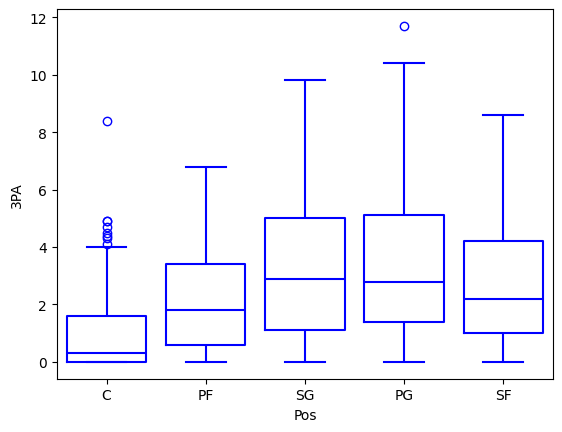

In [124]:
sns.boxplot(df_corr, x='Pos', y='3PA', fill=False, color='blue')

<Axes: xlabel='Pos', ylabel='3P'>

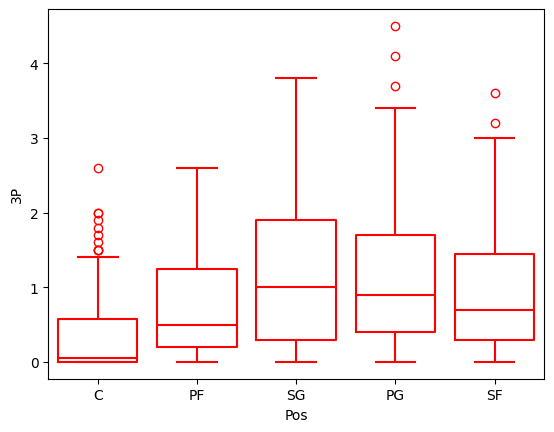

In [125]:
sns.boxplot(df_corr, x='Pos', y='3P', fill=False, color='red')

##### 2 Pontos

<Axes: xlabel='Pos', ylabel='2PA'>

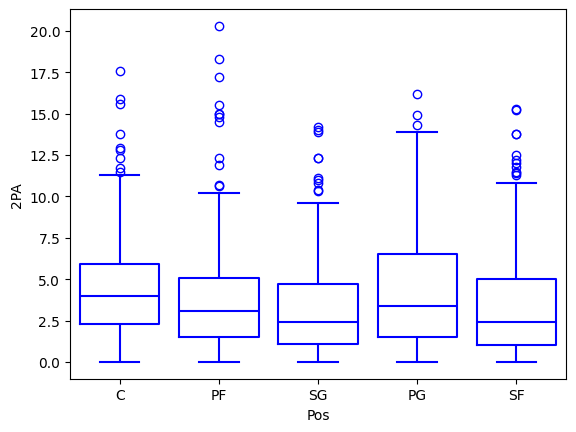

In [126]:
sns.boxplot(df_corr, x='Pos', y='2PA', fill=False, color='blue')

<Axes: xlabel='Pos', ylabel='2P'>

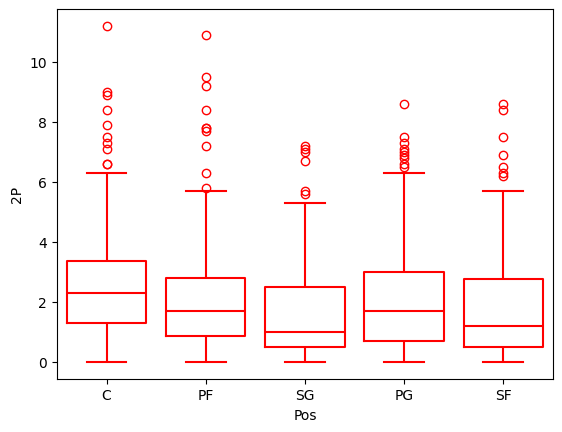

In [127]:
sns.boxplot(df_corr, x='Pos', y='2P', fill=False, color='red')

Após análise dos dados de correlação, o grupo optou por efetuar uma análise de distribuição dos valores com os principais atributos do basquete, independetemente de terem alta correlação com a classe alvo ou não. É possível observar que há uma diferença entre classes em assistências e tentativas de arremessos para 3 pontos. 

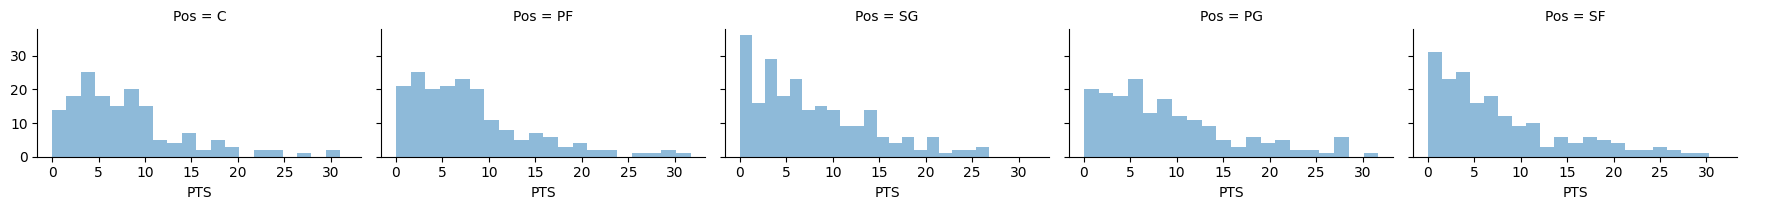

In [128]:
grid_pts = sns.FacetGrid(df_corr, col='Pos', height=2.2, aspect=1.6)
grid_pts.map(plt.hist, 'PTS', alpha=.5, bins=20)
grid_pts.add_legend()

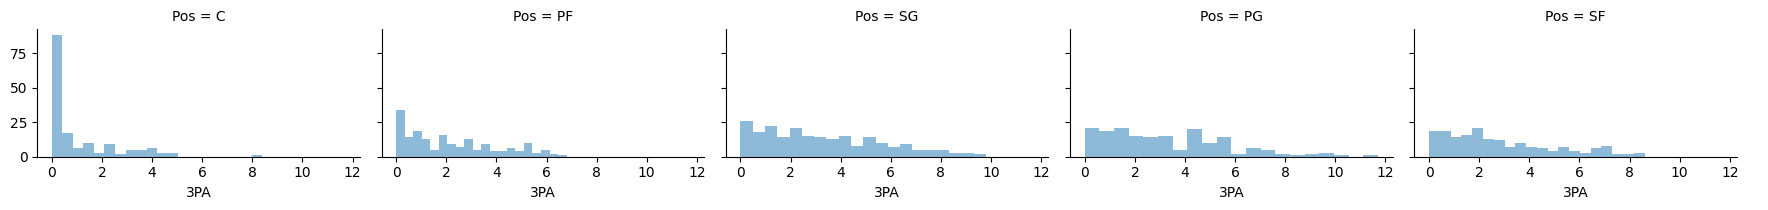

In [129]:
grid_3pa = sns.FacetGrid(df_corr, col='Pos', height=2.2, aspect=1.6)
grid_3pa.map(plt.hist, '3PA', alpha=.5, bins=20)
grid_3pa.add_legend()

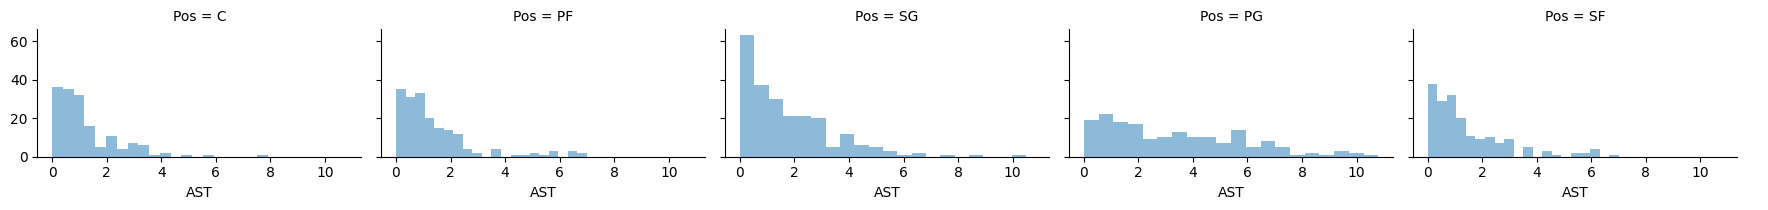

In [130]:
grid_ast = sns.FacetGrid(df_corr, col='Pos', height=2.2, aspect=1.6)
grid_ast.map(plt.hist, 'AST', alpha=.5, bins=20)
grid_ast.add_legend()

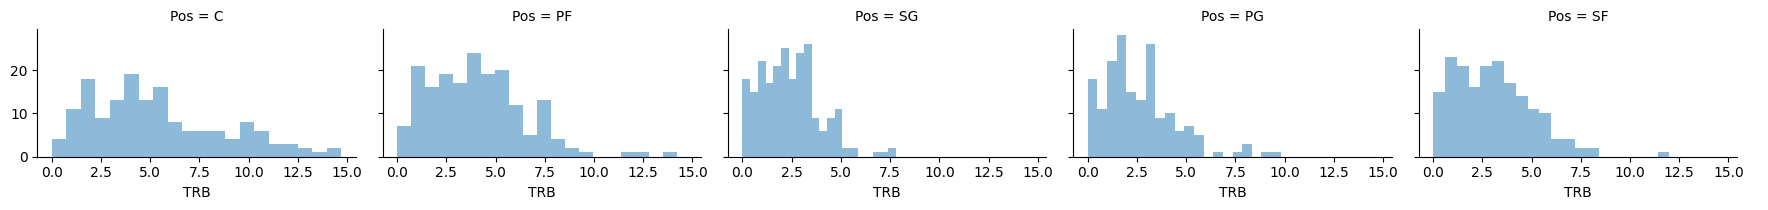

In [131]:
grid_stl = sns.FacetGrid(df_corr, col='Pos', height=2.2, aspect=1.6)
grid_stl.map(plt.hist, 'TRB', alpha=.5, bins=20)
grid_stl.add_legend()

Tendo em vista os resultados obtidos após leitura e análise dos gráficos, além do conhecimento adquirido sobre estátiscas da NBA, o grupo chegou às seguintes colunas para finalizar as análises da EDA.

In [132]:
df_analisado = df_corr[[ 'MP', 'FG', 'FTA', '2PA', '3PA', 'ORB', 'DRB', 'AST', 'BLK', 'STL', 'Pos', 'Pos_Num']]

Com base na leitura dos dados, o grupo realizou um gráfico de dispersão e de correlação com as colunas principais para saber a distribuição dos dados e as correlações entre features com valores plotados. Além disso, o grupo alterou o display da diagonal para melhorar a visualização dos dados e complemento aos histogramas previamente gerados.

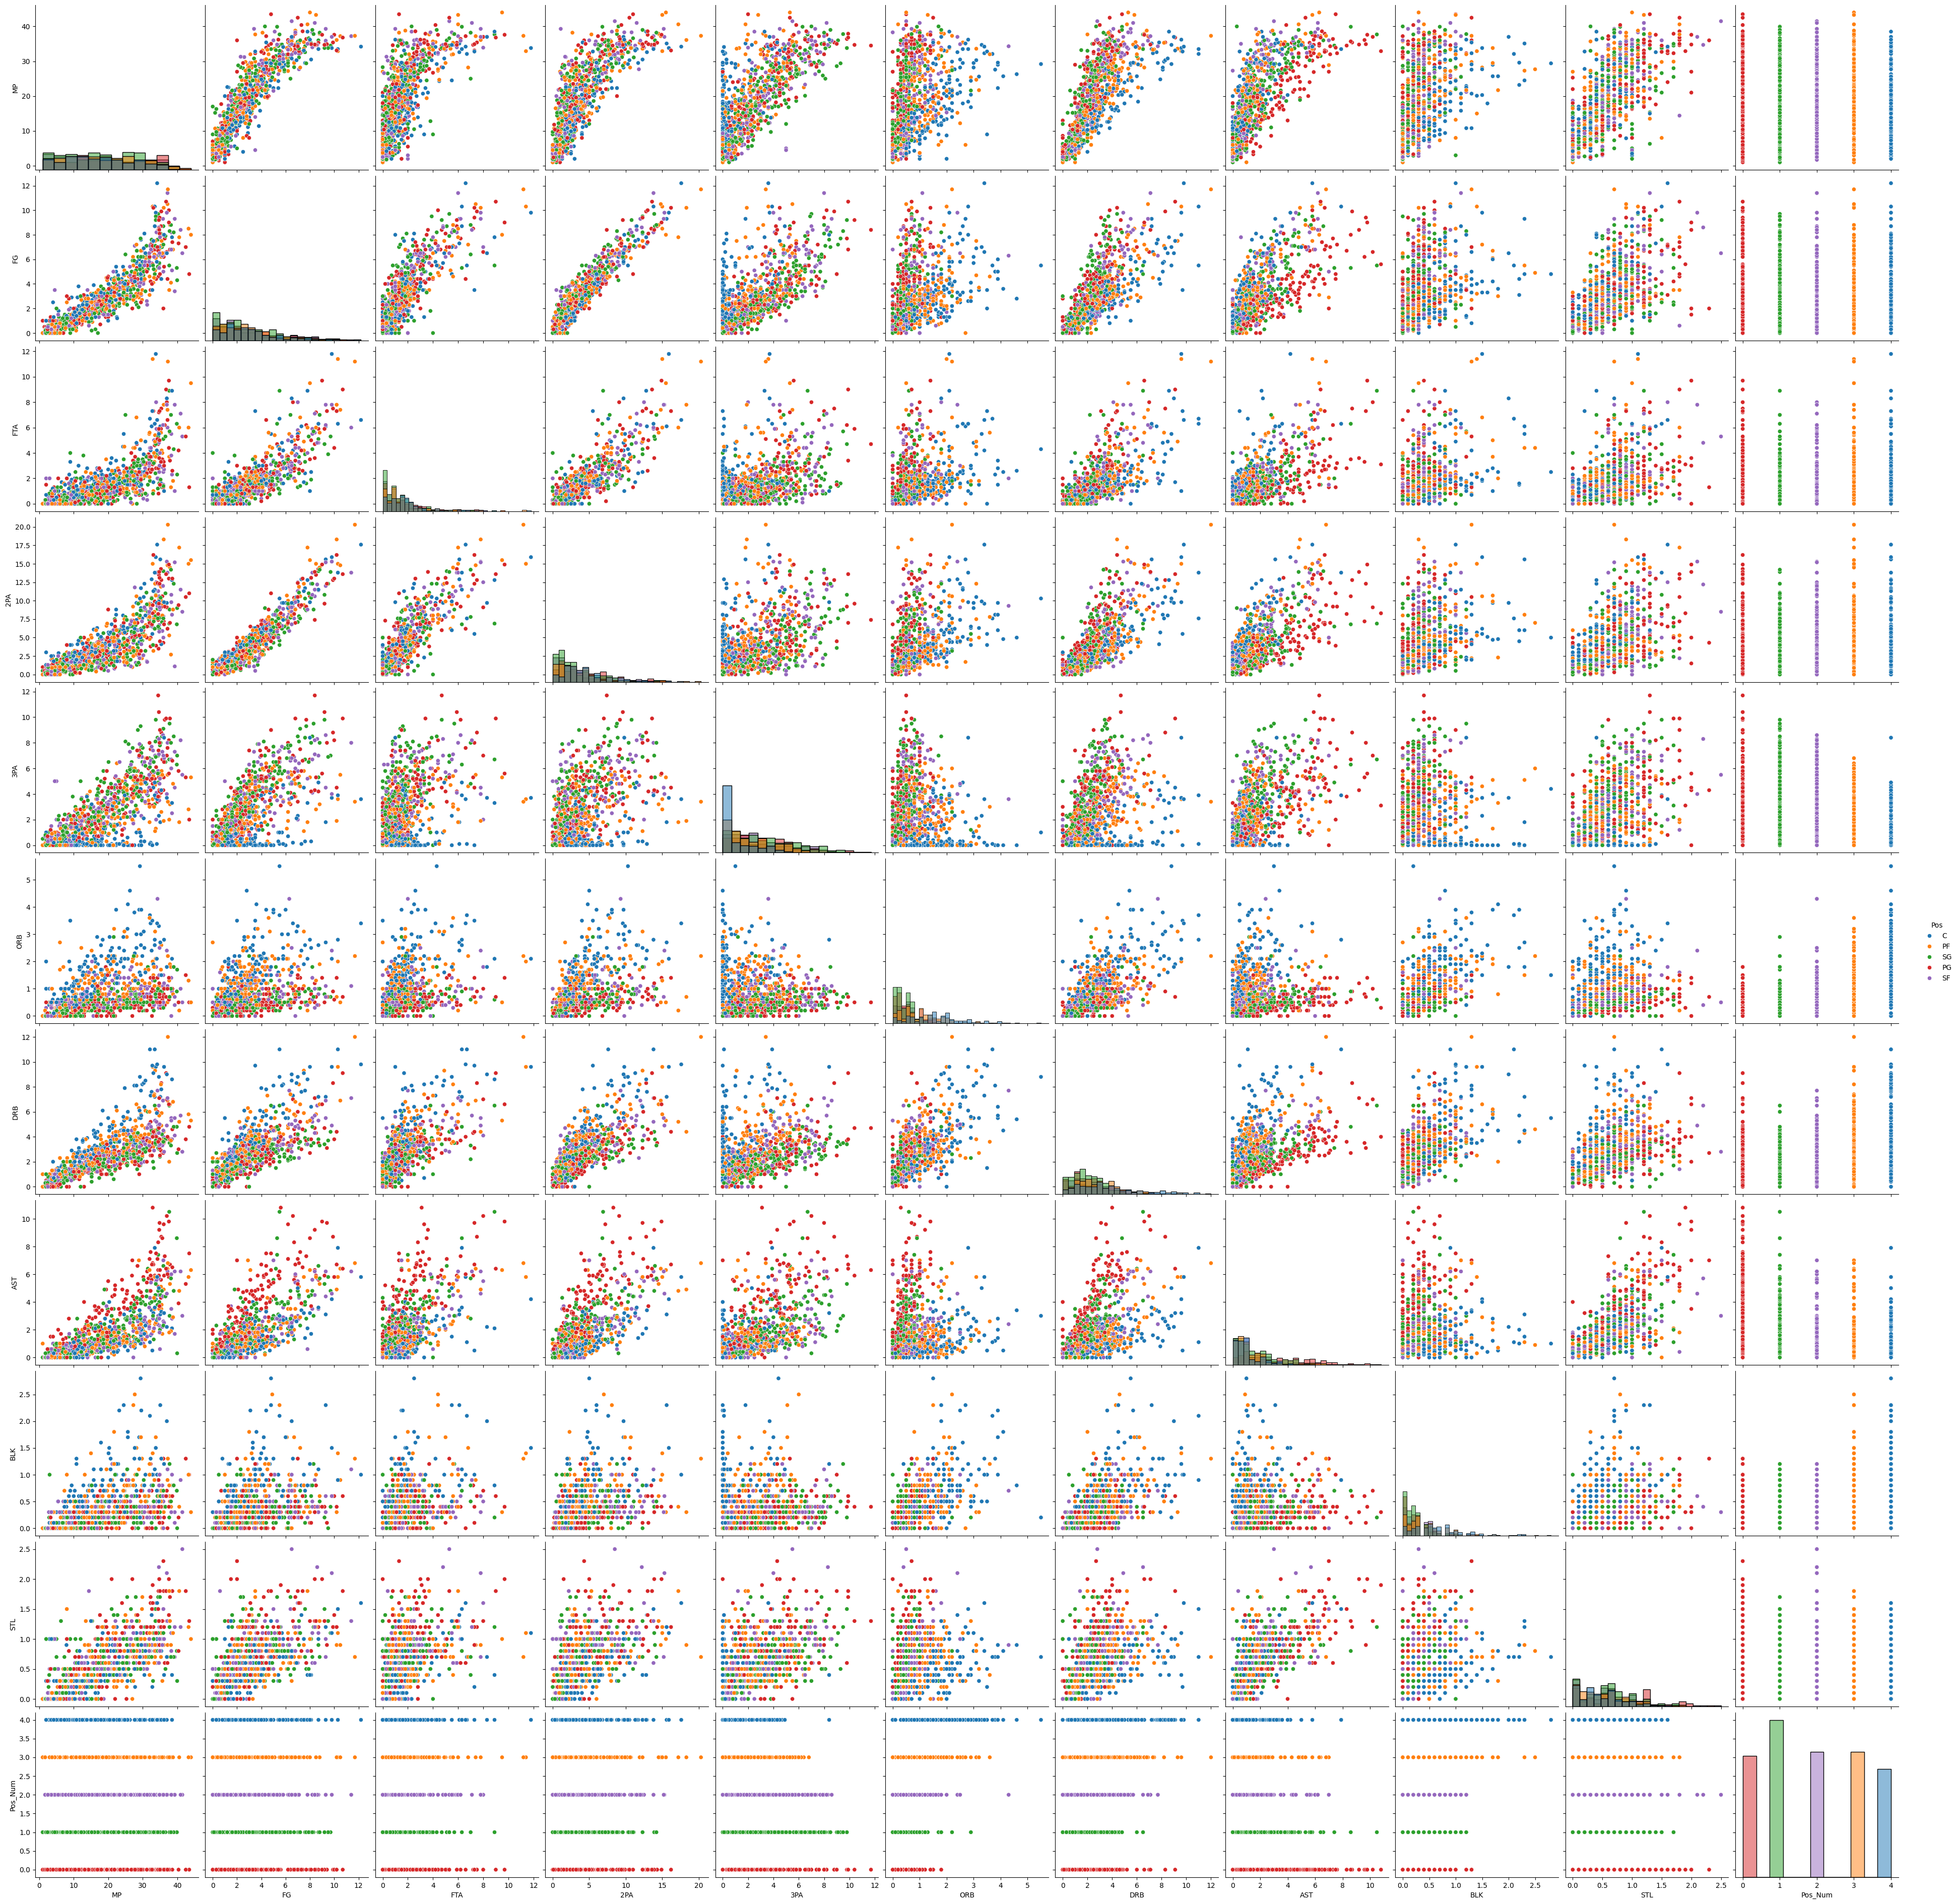

In [133]:
sns.pairplot(df_analisado, hue='Pos', height=3.5, diag_kind='hist')

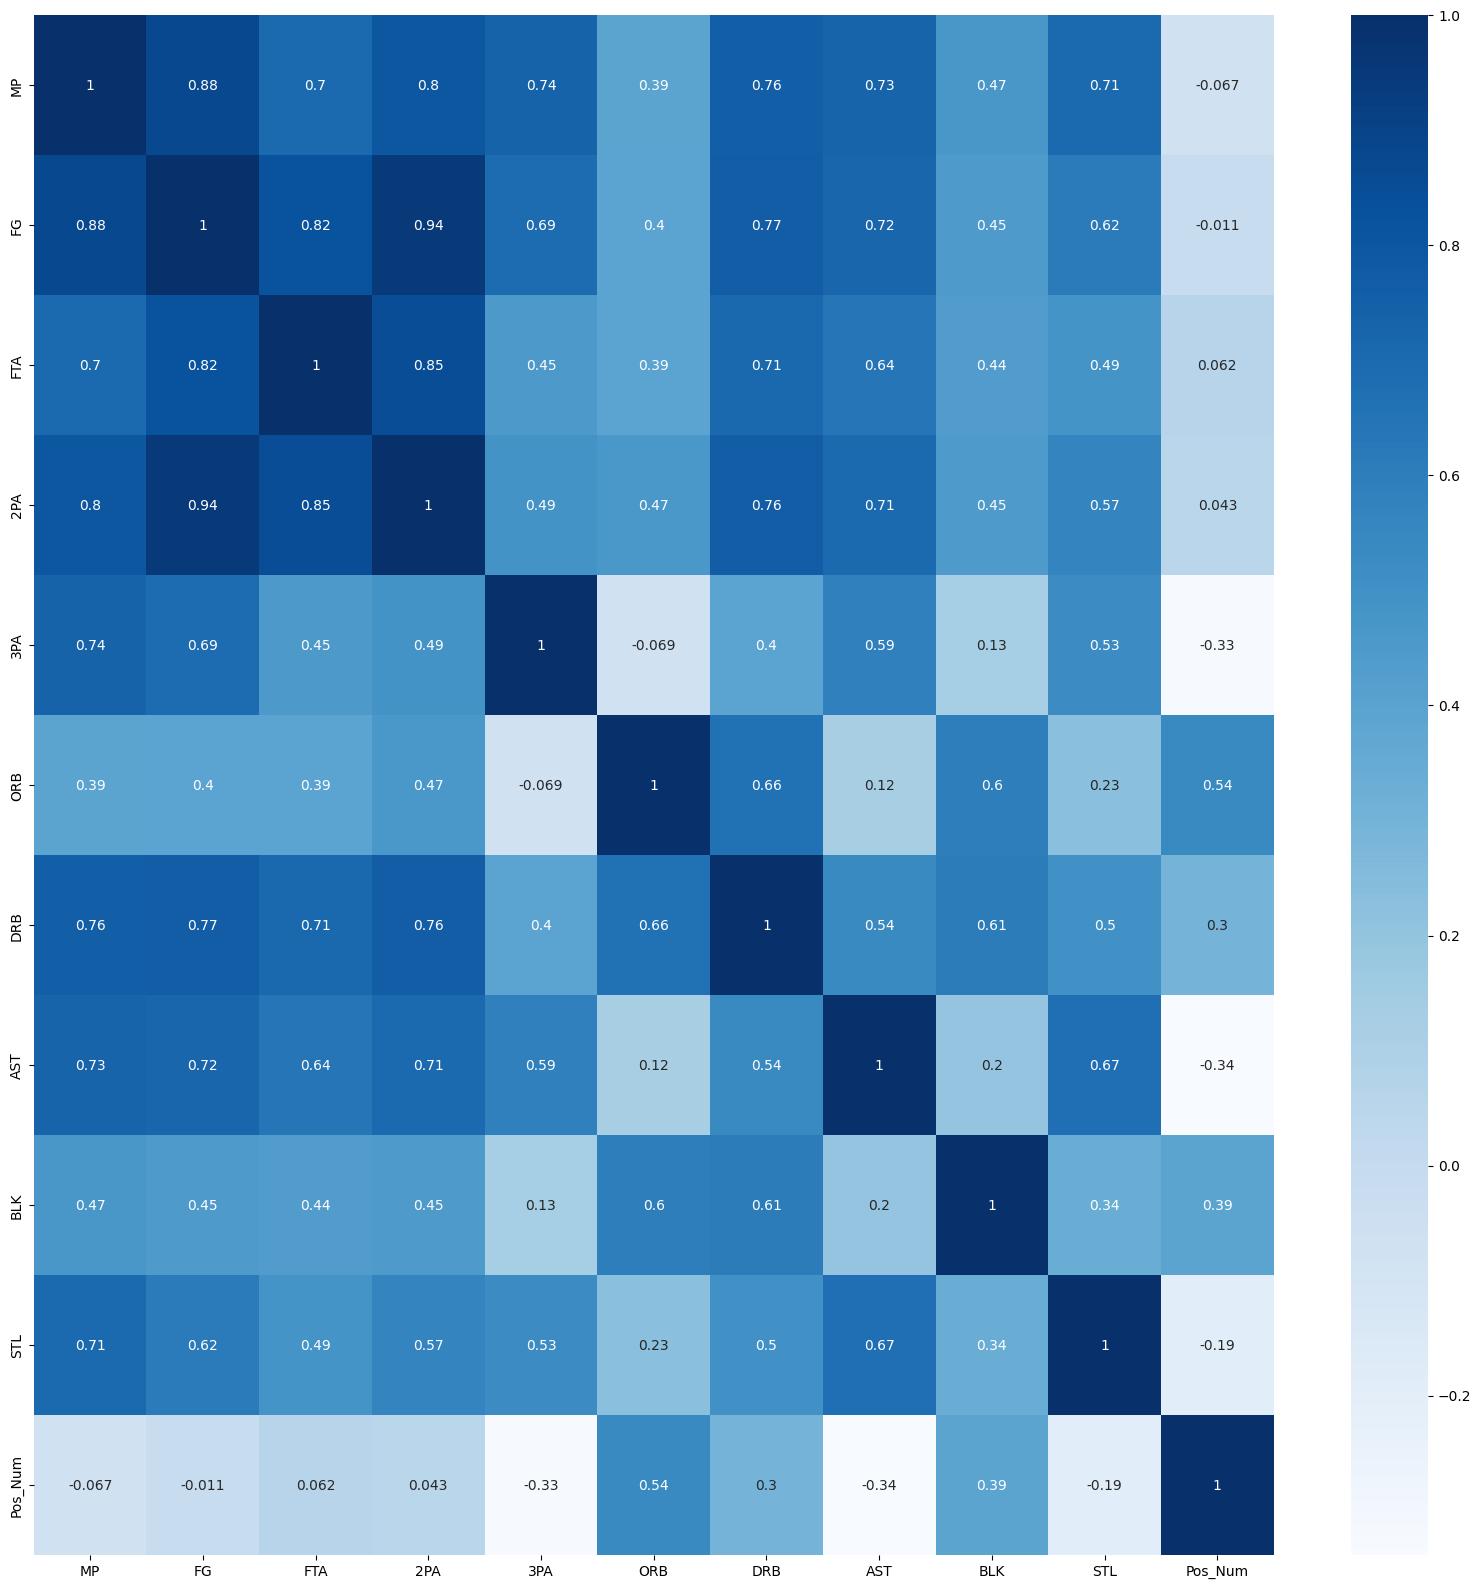

In [134]:
df_updated = df_analisado.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(df_updated, annot=True, cmap='Blues')
plt.show()

## **3. Pré Processamento**

Na etapa de Pré Processamento, o grupo realizará as devidas manipulações de dados e definições finais do Dataset com base no que foi visualizado durante a etapa da EDA, para assim efetuar as predições com os diferentes modelos estudados.

1- Removendo as linhas com Time igual a TOT.

In [135]:
times_para_remover = df_final[df_final['Tm'] == 'TOT'].index
df_final = df_final.drop(posicoes_para_remover)
df_base = df_base.drop(posicoes_para_remover)
df_final['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF'], dtype=object)

2- Removendo as linhas com minutos jogados menores a 1 minuto.

In [136]:
linhas_para_remover = df_total[df_total['MP'] < 1].index
df_final = df_final.drop(linhas_para_remover)

3- Removendo as colunas idade e index.

In [137]:
df_final = df_final.drop(columns=['Rk', 'Age'])

4- Selecionando as principais colunas encontradas após a EDA.

In [138]:
df_final = df_final[['MP', '2PA', '3PA', 'ORB', 'DRB', 'AST', 'BLK', 'STL', 'Pos']]
matriz_features = df_final[['MP', '2PA', '3PA', 'ORB', 'DRB', 'AST', 'BLK', 'STL']]
classe_alvo = df_final[['Pos']]

## **4. Etapa de Classificação - KNN**

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = matriz_features  # Matriz de características
y = classe_alvo  # Vetor de rótulos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.42


c:\Users\leobr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## **5. Etapa de Classificação - Naive Bayes**

PLACEHOLDER

Acurácia: 0.39

Relatório de Classificação Detalhado :
              precision    recall  f1-score   support

           C       0.62      0.42      0.50        50
          PF       0.30      0.27      0.28        45
          PG       0.35      0.37      0.36        51
          SF       0.32      0.12      0.17        60
          SG       0.39      0.68      0.49        74

    accuracy                           0.39       280
   macro avg       0.39      0.37      0.36       280
weighted avg       0.39      0.39      0.37       280



c:\Users\leobr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


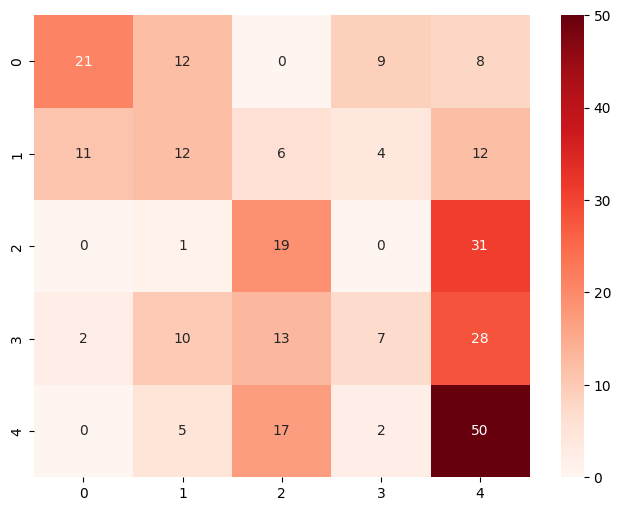

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = matriz_features  # Matriz de características
y = classe_alvo  # Vetor de rótulos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}') # acurácia

print("\nRelatório de Classificação Detalhado :")
print(classification_report(y_test, y_pred, zero_division=0)) # relatório detalhado

cm_final = confusion_matrix(y_test, y_pred) # matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, cmap='Reds')
plt.show()

## **6. Etapa de Classificação - Árvore de Decisão**

Acurácia do modelo: 0.46785714285714286


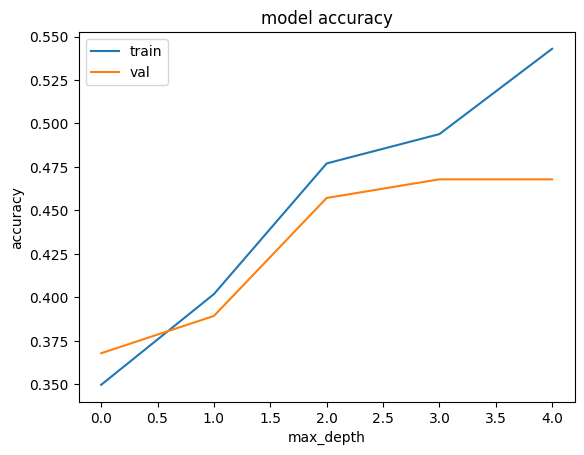

In [158]:
import sklearn.tree as SKTree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import re as re

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

history_acc_train = []
history_acc_test = []

for max_depth in range(1,6):
  clf = SKTree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf = clf.fit(X_train, y_train)
  history_acc_train.append(accuracy_score(y_train,  clf.predict(X_train)))
  history_acc_test.append(accuracy_score(y_test,  clf.predict(X_test)))

acuracia = history_acc_test[4]
print(f"Acurácia do modelo:", acuracia)

# Gráfico Acurácia
plt.plot(history_acc_train)
plt.plot(history_acc_test)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [142]:
#SKTree.plot_tree(clf)

## **7. Etapa de Classificação - Regressão Logística**

Epoch 1/30


c:\Users\leobr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\leobr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1823 - loss: 11.9128 - val_accuracy: 0.2137 - val_loss: 11.7356
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1823 - loss: 11.0612 - val_accuracy: 0.2137 - val_loss: 10.8105
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1843 - loss: 10.2307 - val_accuracy: 0.2137 - val_loss: 9.9082
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1843 - loss: 9.4249 - val_accuracy: 0.2137 - val_loss: 9.0416
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1843 - loss: 8.6513 - val_accuracy: 0.2214 - val_loss: 8.2248
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1862 - loss: 7.9233 - val_accuracy: 0.2290 - val_loss: 7.4738
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1843 - loss: 7.2537 - val_accuracy: 0.2214 - val_loss: 6.7874
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1843 - loss: 6.6423 - val_accuracy: 0.2061 - val_loss: 6.15

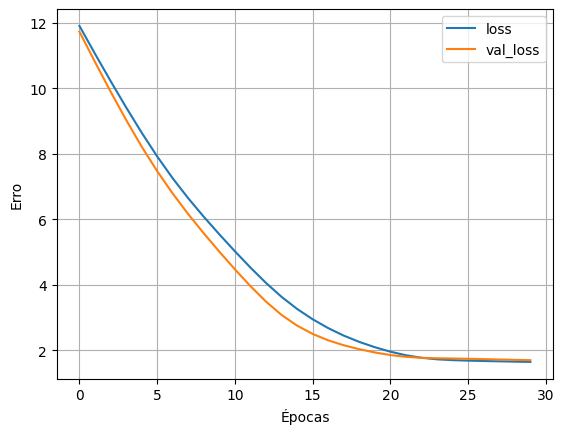

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Acurácia = 0.375
Precisão (weighted): 0.38
Recall (weighted): 0.38
F1-score (weighted): 0.37
Matriz de Confusão:
[[30 11  0  6  3]
 [15  9  3 10  8]
 [ 3  6 13 10 19]
 [ 5  7  6 21 21]
 [ 5  6  6 25 32]]


In [162]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import re as re
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

keras.utils.set_random_seed(43)

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- PASSO 1: Codificar o y_train e y_test ---
# (Assumindo que X_train e X_test já estão 100% numéricos como você mostrou)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
num_classes = len(encoder.classes_)

# Converta X para float32, y já é inteiro, o que é bom para sparse
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


## Train / Test

# --- PASSO 2: Alterar a camada de saída do modelo ---
model = keras.Sequential([
    # Camada de saída com 'num_classes' neurônios e ativação 'softmax'
    layers.Dense(num_classes,  activation='softmax')
])

# --- PASSO 3: Alterar a função de perda (loss) ---
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',  # <--- MUDANÇA AQUI
    metrics=['accuracy']
)

# Agora treine com os dados codificados
history = model.fit(X_train, y_train_encoded, epochs=30, validation_split = 0.2, verbose=1)


## Avaliation

plot_loss(history)

# --- PASSO 4: Ajustar a Avaliação ---
# A saída do modelo não é mais um único número, mas sim um array de probabilidades
y_pred_test_probs = model.predict(X_test)
y_pred_train_probs = model.predict(X_train)

# Precisamos pegar a classe com a MAIOR probabilidade usando np.argmax
y_pred_train_bin = np.argmax(y_pred_train_probs, axis=1)
y_pred_test_bin = np.argmax(y_pred_test_probs, axis=1)

# Agora compare os números (ex: 0, 1, 2)
# print(f"Train accuracy = {accuracy_score(y_train_encoded,  y_pred_train_bin)}")
print(f"Acurácia = {accuracy_score(y_test_encoded,  y_pred_test_bin)}")

# Para as outras métricas, multiclasse pode precisar de 'average="weighted"'
precision = precision_score(y_test_encoded, y_pred_test_bin, average='weighted')
recall = recall_score(y_test_encoded, y_pred_test_bin, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_test_bin, average='weighted')

print(f'Precisão (weighted): {precision:.2f}')
print(f'Recall (weighted): {recall:.2f}')
print(f'F1-score (weighted): {f1:.2f}')

confusion = confusion_matrix(y_test_encoded, y_pred_test_bin)
print("Matriz de Confusão:")
print(confusion)

## **8. Etapa de Classificação - Redes Neurais**

In [178]:
def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.ylim(0, 4.0)
    plt.legend()
    plt.grid(True)
    plt.show()

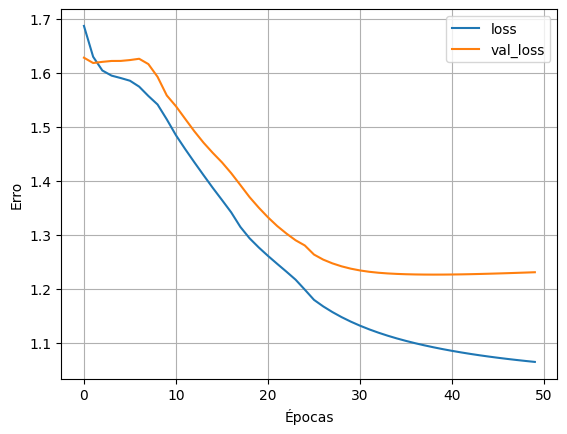

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Acurácia no Teste: 0.5071


In [181]:
# (Certifique-se de ter o número de classes)
# num_classes = len(encoder.classes_)
# Vamos supor que seja 5, baseado no erro (0, 1, 2, 3, 4)
keras.utils.set_random_seed(43)
num_classes = 5 # <--- Ajuste se necessário

model = keras.Sequential([
    layers.Dense(10, activation='tanh'),
    layers.Dense(5, activation='tanh'),
    
    # --- MUDANÇA AQUI ---
    # Mude de 1 neurônio 'sigmoid' para 'num_classes' neurônios 'softmax'
    layers.Dense(num_classes, activation='softmax')
])

# model.summary() # Descomente se quiser ver

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',  # <--- Isso agora está CORRETO
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train_encoded,
    epochs=50,
    validation_split = 0.2,
    batch_size=10,
    verbose=0)


plot_loss(history)
# plot_acc(history) # (Supondo que você tenha essa função)

# --- MUDANÇA NA AVALIAÇÃO ---
# O 'predict' agora retorna um array de probabilidades para cada classe
# Ex: [0.1, 0.0, 0.8, 0.1, 0.0]
y_pred_probs = model.predict(X_test)

# Pegamos o índice (a classe) com a maior probabilidade
y_pred_classes = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import accuracy_score

# Compare os rótulos previstos (ex: 2) com os rótulos reais (ex: y_test_encoded)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f"Acurácia no Teste: {accuracy:.4f}")

## **9. Conclusão**

## Análise do desempenho do modelo Naive Bayes:
A acurácia foi avaliada utilizando duas abordagens: a base completa, contendo todas as colunas numéricas disponíveis, e a base processada, com seleção de features relevantes (FG%, ORB, BLK, 3PA, AST). Observou-se que a base processada apresentou melhor desempenho, atingindo 39,5% de acurácia, contra 35,0% da base completa. Essa diferença de 4,5% evidencia que o pré-processamento e a seleção cuidadosa de variáveis contribuem para uma classificação mais confiável, mesmo utilizando um modelo simples como Naive Bayes. Apesar da acurácia ainda ser moderada, este exercício mostra a importância da exploração de dados e pré-processamento antes da aplicação de algoritmos de classificação.